In [6]:
import os
import shutil
from pathlib import Path

from PIL import Image
from cleanvision import Imagelab

from scripts.remove_duplicates import remove_duplicates

In [ ]:
N_JOBS = os.cpu_count()
DATASET_PATH = Path("~/data/instrument_sterility/0").expanduser().resolve()
CLEANED_DATASET_PATH = Path(f"{DATASET_PATH}-cleaned")
ORIGINAL_SIZE = 1024, 768

In [9]:
def copy_dataset(src_folder: Path, dst_folder: Path) -> None:
    if dst_folder.exists():
        raise FileExistsError(f"Folder {dst_folder} already exists")
    dst_folder.mkdir(parents=True)
    for item in src_folder.iterdir():
        src_path = item
        dst_path = dst_folder / item.name
        if item.is_file():
            shutil.copy2(src_path, dst_path)


def get_dataset_issues(data_path: Path) -> tuple[Imagelab, dict]:
    imagelab = Imagelab(data_path=data_path)
    imagelab.find_issues(n_jobs=N_JOBS)
    return imagelab, imagelab.issue_summary

In [89]:
copy_dataset(DATASET_PATH, CLEANED_DATASET_PATH)

In [7]:
imagelab, issue_summary = get_dataset_issues(CLEANED_DATASET_PATH)

Reading images from /Users/kskada/data/instrument_sterility/0-cleaned
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 2305/2305 [00:22<00:00, 100.48it/s]


Issue checks completed. 103 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


In [8]:
issue_summary

,issue_type,num_images
0,near_duplicates,102
1,odd_size,1
2,dark,0
3,light,0
4,odd_aspect_ratio,0
5,blurry,0
6,low_information,0
7,grayscale,0
8,exact_duplicates,0


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | exact_duplicates |         1118 | 

----------------- exact_duplicates images ------------------

Number of examples with this issue: 1118
Examples representing most severe instances of this issue:

Set: 0


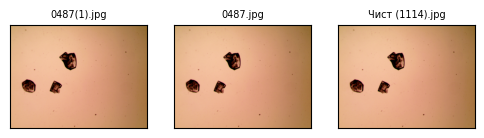

Set: 1


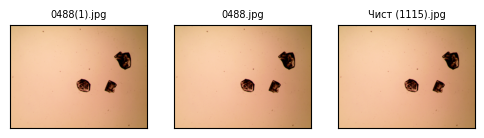

Set: 2


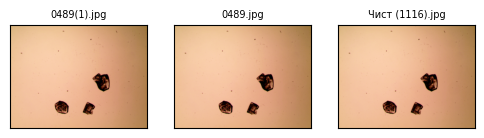

In [92]:
imagelab.report(issue_types=["exact_duplicates"], num_images=3)

In [93]:
exact_duplicates_sets = imagelab.info["exact_duplicates"]["sets"]
exact_duplicates_sets[:3]

[['/Users/kskada/data/instrument_sterility/0-cleaned/0485(1).jpg',
  '/Users/kskada/data/instrument_sterility/0-cleaned/0485.jpg'],
 ['/Users/kskada/data/instrument_sterility/0-cleaned/0486(1).jpg',
  '/Users/kskada/data/instrument_sterility/0-cleaned/0486.jpg'],
 ['/Users/kskada/data/instrument_sterility/0-cleaned/0487(1).jpg',
  '/Users/kskada/data/instrument_sterility/0-cleaned/0487.jpg',
  '/Users/kskada/data/instrument_sterility/0-cleaned/Чист (1114).jpg']]

In [94]:
remove_duplicates(
    duplicate_sets=exact_duplicates_sets,
    work_folder=CLEANED_DATASET_PATH,
)

Work folder: /Users/kskada/data/instrument_sterility/0-cleaned
Found 531 sets of exact duplicates
Processing duplicate set 1/531 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/0485.jpg
Processing duplicate set 2/531 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/0486.jpg
Processing duplicate set 3/531 with 3 images
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/0487.jpg
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/Чист (1114).jpg
Processing duplicate set 4/531 with 3 images
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/0488.jpg
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/Чист (1115).jpg
Processing duplicate set 5/531 with 3 images
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/0489.jpg
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/Чист (1116).jpg
Processing duplicate set 6/531 with 3 images
Deleted: /Users/kskada/data/instrument_sterility/0-cleaned/0490.jpg

(531, 587)

In [95]:
imagelab, issue_summary = get_dataset_issues(CLEANED_DATASET_PATH)

Reading images from /Users/kskada/data/instrument_sterility/0-cleaned
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 2305/2305 [00:09<00:00, 231.79it/s]


Issue checks completed. 103 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


In [14]:
issue_summary

,issue_type,num_images
0,near_duplicates,102
1,odd_size,1
2,dark,0
3,light,0
4,odd_aspect_ratio,0
5,blurry,0
6,low_information,0
7,grayscale,0
8,exact_duplicates,0


Issues found in images in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  1 | odd_size     |            1 | 

--------------------- odd_size images ----------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



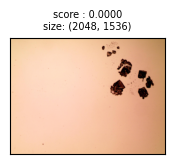

In [10]:
imagelab.report(issue_types=["odd_size"], num_images=3)

In [15]:
odd_size_list = imagelab.issues[imagelab.issues["is_odd_size_issue"]].index.to_list()
odd_size_list

['/Users/kskada/data/instrument_sterility/0-cleaned/Чист (1028).jpg']

In [ ]:
for img_path in odd_size_list:
    img = Image.open(img_path)
    img = img.resize(ORIGINAL_SIZE)
    img.save(img_path)

In [21]:
imagelab, issue_summary = get_dataset_issues(CLEANED_DATASET_PATH)
issue_summary

Reading images from /Users/kskada/data/instrument_sterility/0-cleaned
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/2305 [00:00<?, ?it/s]0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that fr

Issue checks completed. 102 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


,issue_type,num_images
0,near_duplicates,102
1,dark,0
2,light,0
3,low_information,0
4,odd_aspect_ratio,0
5,blurry,0
6,grayscale,0
7,odd_size,0
8,exact_duplicates,0


In [23]:
DATASET_PATH = Path("~/data/instrument_sterility/1").expanduser().resolve()
CLEANED_DATASET_PATH = Path(f"{DATASET_PATH}-cleaned")

In [24]:
copy_dataset(DATASET_PATH, CLEANED_DATASET_PATH)

In [25]:
imagelab, issue_summary = get_dataset_issues(CLEANED_DATASET_PATH)
issue_summary

Reading images from /Users/kskada/data/instrument_sterility/1-cleaned
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/3295 [00:00<?, ?it/s]0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - to python to disable frozen modules.
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen

Issue checks completed. 1931 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


,issue_type,num_images
0,exact_duplicates,1865
1,near_duplicates,50
2,odd_size,16
3,dark,0
4,light,0
5,blurry,0
6,low_information,0
7,odd_aspect_ratio,0
8,grayscale,0


In [26]:
exact_duplicates_sets = imagelab.info["exact_duplicates"]["sets"]
exact_duplicates_sets[:3]

[['/Users/kskada/data/instrument_sterility/1-cleaned/0702.jpg',
  '/Users/kskada/data/instrument_sterility/1-cleaned/РП (307).jpg'],
 ['/Users/kskada/data/instrument_sterility/1-cleaned/0703.jpg',
  '/Users/kskada/data/instrument_sterility/1-cleaned/РП (308).jpg'],
 ['/Users/kskada/data/instrument_sterility/1-cleaned/0704.jpg',
  '/Users/kskada/data/instrument_sterility/1-cleaned/РП (309).jpg']]

In [27]:
remove_duplicates(
    duplicate_sets=exact_duplicates_sets,
    work_folder=CLEANED_DATASET_PATH,
)

Work folder: /Users/kskada/data/instrument_sterility/1-cleaned
Found 908 sets of exact duplicates
Processing duplicate set 1/908 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/1-cleaned/РП (307).jpg
Processing duplicate set 2/908 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/1-cleaned/РП (308).jpg
Processing duplicate set 3/908 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/1-cleaned/РП (309).jpg
Processing duplicate set 4/908 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/1-cleaned/РП (310).jpg
Processing duplicate set 5/908 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/1-cleaned/РП (311).jpg
Processing duplicate set 6/908 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/1-cleaned/РП (312).jpg
Processing duplicate set 7/908 with 2 images
Deleted: /Users/kskada/data/instrument_sterility/1-cleaned/РП (313).jpg
Processing duplicate set 8/908 with 2 images
Deleted: /Users/kskada/data/instrument

In [28]:
odd_size_list = imagelab.issues[imagelab.issues["is_odd_size_issue"]].index.to_list()
odd_size_list

['/Users/kskada/data/instrument_sterility/1-cleaned/РД (1).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (10).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (11).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (13).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (14).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (15).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (16).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (17).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (2).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (3).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (4).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (5).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (6).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (7).jpg',
 '/Users/kskada/data/instrument_sterility/1-cleaned/РД (8).jpg',
 '/Users/kskada/da

In [29]:
for img_path in odd_size_list:
    img = Image.open(img_path)
    img = img.resize(ORIGINAL_SIZE)
    img.save(img_path)

In [30]:
imagelab, issue_summary = get_dataset_issues(CLEANED_DATASET_PATH)
issue_summary

Reading images from /Users/kskada/data/instrument_sterility/1-cleaned
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/2338 [00:00<?, ?it/s]0.02s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that fr

Issue checks completed. 40 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


,issue_type,num_images
0,near_duplicates,40
1,dark,0
2,light,0
3,low_information,0
4,odd_aspect_ratio,0
5,blurry,0
6,grayscale,0
7,odd_size,0
8,exact_duplicates,0
